Hello everyone! My name is Tahiya. I am a data science enthusiat. This is one of my work where I checked and learned the sample data from the other competetors and create my own data set for the competetions. I always love to follow a workflow that I create in my planninf phase for any data science project. 

## Workflow <a class="anchor"  id="subsection109"></a>

 * [EDA (Explanatory Data Analysis)](#chapter1)
 * [Data distribution of categorical columns](#subsection2)
 * [Impact on price](#subsection3)
 * [Price Distribution](#subsection4)
 * [Corralation Matrix](#subsection5)
 * [Data Cleansing](#subsection6)
 * [Train Test Split](#subsection21)
 * [Model parameter adjustments](#subsection20)
 * [Model Evaluation ](#subsection7)

 ## Import Library  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split  
import warnings 
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

warnings.filterwarnings('ignore')


 ## EDA (Explanatory Data Analysis)  <a class="anchor"  id="chapter1"></a>

In [2]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test =  pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
df_train.describe(include='number')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df_train.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


## Data distribution of categorical columns <a class="anchor"  id="subsection2"></a>

In [5]:
obj_cols = df_train.select_dtypes(include='object').columns.tolist()
fig = make_subplots(rows=9, cols=5,horizontal_spacing=0.001, vertical_spacing=0.005,specs=[[{'type': 'domain'}]*5]*9)


for id,col in enumerate(obj_cols):
    row,col_num= id//5 , id%5
    val_count = df_train[col].value_counts()
    x = val_count.index.tolist()
    y = val_count.values.tolist()
    my_pie=go.Pie(labels=x,values=y,name= col,hole=0.6,
                  hovertext='label+percent',hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont=dict(family='Arial',size=14,color='black'),
                  textposition='inside',title=col,titlefont=dict(family='Arial',size=16,color='black'),
                  showlegend=False,
                  )
    fig.update_layout(autosize=False,
    width=1200,
    height=1500,
    margin=dict(
        l=10,
        r=30,
        b=10,
        t=10
    ),
    paper_bgcolor="LightSteelBlue",
                      )
    fig.add_trace(my_pie,row=row+1,col=col_num+1)
fig.show()
    


## Impact on price <a class="anchor"  id="subsection3"></a>

In [6]:
corr_price = pd.DataFrame(df_train.select_dtypes(include='number').corr()["SalePrice"].drop("SalePrice").sort_values(ascending=False).head(10))
corr_price.style.background_gradient(cmap='winter')

,SalePrice
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
YearRemodAdd,0.507101



## Price Distribution <a class="anchor"  id="subsection4"></a>

([Text(-100000.0, 0, '-100000.0'),
  Text(0.0, 0, '0.0'),
  Text(100000.0, 0, '100000.0'),
  Text(200000.0, 0, '200000.0'),
  Text(300000.0, 0, '300000.0'),
  Text(400000.0, 0, '400000.0'),
  Text(500000.0, 0, '500000.0'),
  Text(600000.0, 0, '600000.0'),
  Text(700000.0, 0, '700000.0'),
  Text(800000.0, 0, '800000.0')],)

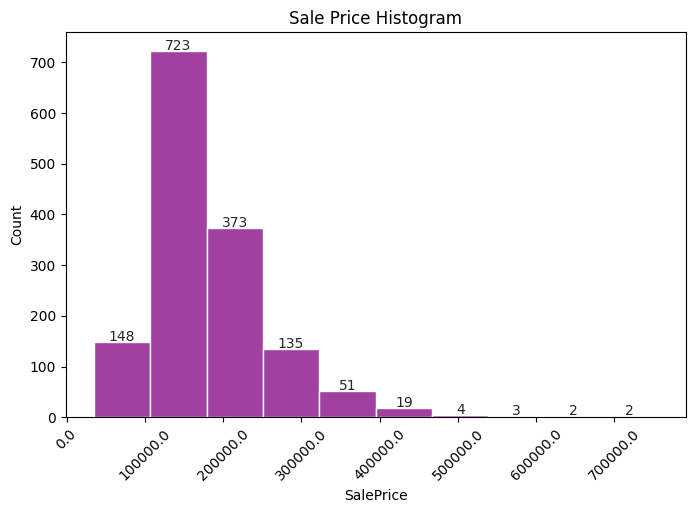

In [7]:
fig,ax = plt.subplots(figsize=(8,5),nrows=1,ncols=1)
sns.set_style("ticks")
_ , bin_edges = np.histogram(df_train["SalePrice"], range=(np.floor(df_train["SalePrice"].min()), np.ceil(df_train["SalePrice"].max())))

hist = sns.histplot(data=df_train["SalePrice"],bins=bin_edges,kde=False,ax=ax,color='purple')

for p in hist.patches:
    hist.annotate(f"{p.get_height()}",(p.get_x()+p.get_width()/2, p.get_height()+2), ha="center")


ax.set_title('Sale Price Histogram')
ax.set_xticklabels(np.ceil(ax.get_xticks()), rotation = 45),




## Correlation Matrix <a class="anchor"  id="subsection5"></a>


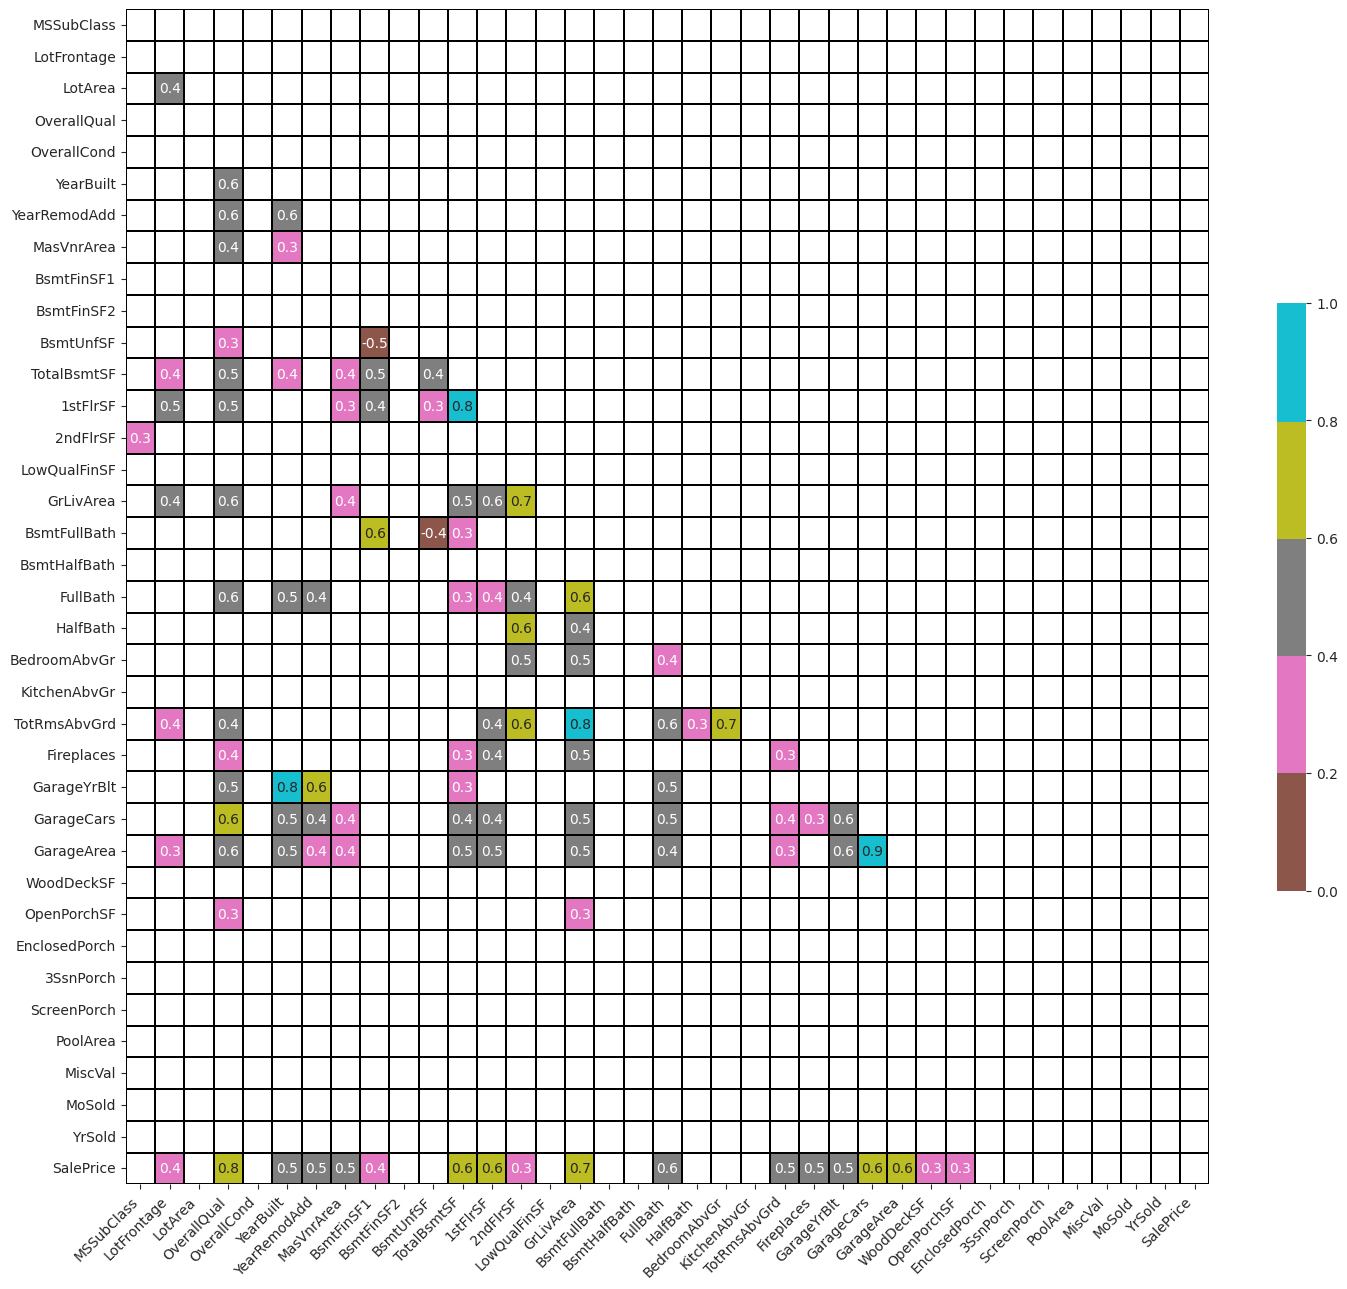

In [8]:
df_num = df_train.select_dtypes(include='number').drop("Id",axis=1)

corr = df_num.corr()
corr = corr[(corr>0.3)|(corr<-0.4)]

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (15,13))
sns.heatmap(corr,mask=mask,vmin=0,vmax=1,center=0,cmap='tab10',fmt=".1f",annot=True,linewidths=0.05,linecolor='black',cbar_kws={"shrink": 0.5})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [9]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


## Data Cleansing  <a class="anchor"  id="subsection6"></a>


In [10]:
df_train.drop(["PoolQC","Fence","MiscFeature","Alley","Id","MasVnrType","FireplaceQu"],inplace=True,axis=1)

## Train Test Split <a class="anchor"  id="subsection21"></a>

In [11]:

cat_df_train = df_train.select_dtypes(include='object').columns.tolist()
df_train[cat_df_train] = df_train[cat_df_train].fillna("Missing")

y = df_train["SalePrice"]
X = df_train.drop("SalePrice",axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42)

print(
      x_train.shape,
      y_train.shape,
      x_test.shape,
      y_test.shape
      )

(1095, 73) (1095,) (365, 73) (365,)


 ## Model parameter adjustments <a class="anchor"  id="subsection20"></a>

In [12]:
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    l2_leaf_reg=5,
    random_strength=5,
    bagging_temperature=0.8,
    border_count=128,
    eval_metric='RMSE'
)
fit_model = model.fit(x_train,y_train,eval_set=(x_test,y_test),verbose=100,cat_features=cat_df_train)

pred_y = model.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, pred_y))
mae = mean_absolute_error(y_test, pred_y)
r2 = r2_score(y_test, pred_y)

print(f"RMSE: {round(rmse,2)}")
print(f"MAE: {round(mae,2)}")
print(f"R^2: {round(r2,2)}")

0:	learn: 76758.8483011	test: 82564.9267834	best: 82564.9267834 (0)	total: 79ms	remaining: 1m 18s
100:	learn: 34168.4366537	test: 39095.3791816	best: 39095.3791816 (100)	total: 1.89s	remaining: 16.9s
200:	learn: 26946.9662213	test: 32277.7415592	best: 32277.7415592 (200)	total: 3.52s	remaining: 14s
300:	learn: 22755.2390065	test: 29449.1742160	best: 29449.1742160 (300)	total: 5.24s	remaining: 12.2s
400:	learn: 19466.4506374	test: 27864.9308484	best: 27864.9308484 (400)	total: 6.99s	remaining: 10.4s
500:	learn: 17243.3735446	test: 27005.9558143	best: 27001.7930037 (499)	total: 8.76s	remaining: 8.72s
600:	learn: 15327.4910436	test: 26342.8483049	best: 26342.8483049 (600)	total: 10.7s	remaining: 7.07s
700:	learn: 13927.3468908	test: 25992.4201430	best: 25980.4608667 (698)	total: 12.5s	remaining: 5.35s
800:	learn: 12868.3905766	test: 25756.7942067	best: 25756.1099032 (799)	total: 14.5s	remaining: 3.59s
900:	learn: 11898.3429910	test: 25660.6186776	best: 25660.6186776 (900)	total: 16.7s	rem

rmse: 25576.69

mae: 15121.29

r^2: 0.91 

Pretty good result!

  ## Model Evaluation <a class="anchor"  id="subsection7"></a>


In [13]:
final_result = pd.DataFrame({'actually': y_test, 'predicted': np.ceil(pred_y)})
final_result.sample(10)

,actually,predicted
233,128200,132471.0
58,438780,409640.0
782,187100,194759.0
380,127000,149468.0
838,144000,157174.0
529,200624,285422.0
65,317000,300465.0
76,135750,112750.0
1049,84900,110928.0
86,174000,179496.0


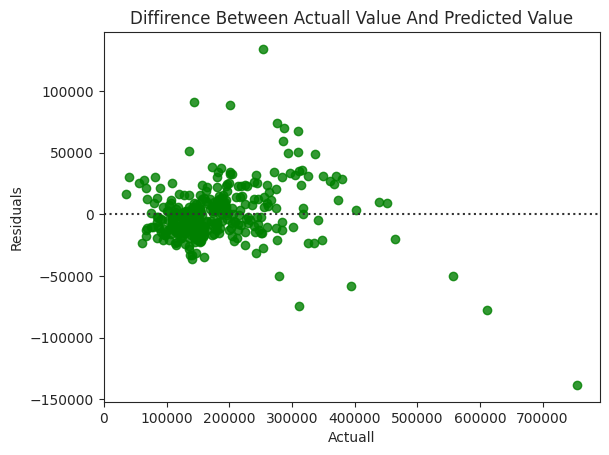

In [14]:
sns.residplot(x=y_test, y=pred_y, color="g")
plt.xlabel('Actuall')
plt.ylabel('Residuals')
plt.title('Diffirence Between Actuall Value And Predicted Value')
plt.show()